<a href="https://colab.research.google.com/github/ConstanzaSchibber/capstone_colors/blob/main/notebooks/1_DataEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 1: Data Pipeline, Data Wrangling, Exploratory Data Analysis




# Libraries

Creating requirements for environment.

In [2]:
!pip freeze > requirements.txt
!pip list --format=freeze > requirements.txt

Importing libraries.

In [34]:
import os
from getpass import getpass
import urllib
import requests

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
import glob

In [186]:
from PIL import Image

In [117]:
!pip install validators

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.8 MB/s eta 0:00:00


In [118]:
import validators

In [171]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Reading & Wrangling Data

In [172]:
df_1 = pd.read_csv('/content/drive/MyDrive/mauve products - products.csv')
df_1.columns

Index(['category', 'joined', 'brand', 'product', 'shade', 'shade_description',
       'shade_description_original', 'img_url', 'discontinued', 'clean',
       'bipoc-founded', 'skin_tones_1', 'skin_tones_2', 'undertones_1',
       'finish_1', 'finish_2', 'finish_3', 'descriptor_1', 'descriptor_2',
       'intensity_1', 'intensity_2', 'intensity_3', 'muted_1', 'muted_2',
       'shimmer_1', 'shimmer_2', 'shimmer_3', 'adaptive'],
      dtype='object')

In [12]:
# read images and save in a folder
df_1 = df_1[df_1.img_url.notna()]
df_1.shape

(269, 28)

In [13]:
df_2 = pd.read_csv('/content/drive/MyDrive/peach_products - Sheet1.csv')
df_2.columns

Index(['category', 'joined', 'brand', 'product', 'shade', 'clean',
       'bipoc-founded', 'image', 'shade_description_original',
       'shade_description', 'shade_description_colors_only',
       'secondary_colors_1', 'skin_tones_1', 'skin_tones_2', 'undertones_1',
       'undertones_2', 'descriptor_1', 'intensity_1', 'intensity_2', 'muted_1',
       'finish_1', 'finish_2', 'finish_3', 'shimmer_1', 'shimmer_2',
       'shimmer_3', 'adaptive'],
      dtype='object')

In [15]:
# read images and save in a folder
df_2 = df_2[df_2.image.notna()]
df_2.shape

(274, 27)

In [24]:
df_mauve = df_1[['category',
                 'joined',
                 'brand',
                 'product',
                 'shade',
                'img_url',
                 'shade_description_original']]

In [25]:
df_peach = df_2[['category',
                 'joined',
                 'brand',
                 'product',
                 'shade',
                 'image',
                 'shade_description_original']]

In [26]:
df_peach = df_peach.rename({'image': 'img_url'}, axis=1)

In [27]:
df = pd.concat([df_peach, df_mauve], axis=0)

In [28]:
df.shape

(543, 7)

In [29]:
df.head()

,category,joined,brand,product,shade,img_url,shade_description_original
1,blush,14e cosmetics blush sunset,14e cosmetics,blush,sunset,https://images.squarespace-cdn.com/content/v1/...,warm peachy
2,blush,a'pieu juicy-pang water blusher cr01,a'pieu,juicy-pang water blusher,cr01,https://misshaus.com/cdn/shop/files/juicypangw...,peach
3,blush,about-face cheek freak blush balm raunchy,about-face,cheek freak blush balm,raunchy,https://aboutface.com/cdn/shop/products/CF_PDP...,nude peach
6,blush,alamar cosmetics colorete concentrate liquid b...,alamar cosmetics,colorete concentrate liquid blush,amor de melocoton,https://alamarcosmetics.com/cdn/shop/products/...,creamy peach
13,blush,anastasia beverly hills stick cream blush peac...,anastasia beverly hills,stick cream blush,peachy keen,https://www.sephora.com/productimages/sku/s247...,soft peach


In [92]:
df = df.reset_index()

In [93]:
df['id'] = df.index + 1

# Collecting Images

## Validate URLs

I validate the URLs in case the data is not an URL. I find that a few cases had something that was not a URL.

In [123]:
df['validation'] = '0'

for i in range(len(df)):
  url = df.loc[i, 'img_url']
  df.loc[i, 'validation'] = validators.url(url)

Here we see that 527 rows have a valid URL and others do not for a number of reasons:

In [124]:
df['validation'].value_counts()

,count
validation,
True,527
"ValidationError(func=url, args={'reason': ""bad query field: '$md$'"", 'value': 'https://images.ulta.com/is/image/Ulta/2544328sm?$md$&id=NDNaY0&fmt=jpg&fit=constrain,1&wid=260&hei=65&op_sharpen=1&resMode=bilin'})",1
"ValidationError(func=url, args={'reason': ""bad query field: '$md$'"", 'value': 'https://images.ulta.com/is/image/Ulta/2304144sm?$md$&id=bp_at3&fmt=jpg&fit=constrain,1&wid=260&hei=352&op_sharpen=1&resMode=bilin'})",1
"ValidationError(func=url, args={'reason': ""bad query field: '$md$'"", 'value': 'https://images.ulta.com/is/image/Ulta/2547931sm?$md$&id=W6Man0&fmt=jpg&fit=constrain,1&wid=260&hei=228&op_sharpen=1&resMode=bilin'})",1
"ValidationError(func=url, args={'reason': ""bad query field: '$md$'"", 'value': 'https://images.ulta.com/is/image/Ulta/2553699sm?$md$&id=lDcb80&fmt=jpg&fit=constrain,1&wid=260&hei=257&op_sharpen=1&resMode=bilin'})",1
"ValidationError(func=url, args={'reason': ""bad query field: '$md$'"", 'value': 'https://images.ulta.com/is/image/Ulta/2554320sm?$md$&id=q7NaV1&fmt=jpg&fit=constrain,1&wid=260&hei=248&op_sharpen=1&resMode=bilin'})",1
"ValidationError(func=url, args={'reason': ""bad query field: '$md$'"", 'value': 'https://images.ulta.com/is/image/Ulta/2303705sm?$md$&id=mqGaR2&fmt=jpg&fit=constrain,1&wid=260&hei=209&op_sharpen=1&resMode=bilin'})",1
"ValidationError(func=url, args={'reason': ""bad query field: '$md$'"", 'value': 'https://images.ulta.com/is/image/Ulta/2303706sm?$md$&id=1goaZ3&fmt=jpg&fit=constrain,1&wid=260&hei=209&op_sharpen=1&resMode=bilin'})",1
"ValidationError(func=url, args={'reason': ""bad query field: '$md$'"", 'value': 'https://images.ulta.com/is/image/Ulta/2299243sm?$md$&id=hVhak2&fmt=jpg&fit=constrain,1&wid=260&hei=205&op_sharpen=1&resMode=bilin'})",1


In [125]:
df.shape

(543, 11)

In [126]:
df = df[df.validation == True]

In [130]:
df = df.reset_index()

In [131]:
df.shape

(527, 12)

## Download Images

In [182]:
def download(dest_folder: str):
  '''
  This function takes the images from the URL and saves them
  The file saved uses the filename from the URL because files have
  different extensions. The exception is ULTA urls, because they
  did not provide a file name so I created a file name.
  I save the name of the image in a column in the original table
  for linking image and data of the product. If an URL was broken,
  I save that error code in the table to identify products with a broken
  URL.
  '''

  # create folder if it does not exist
  #if not os.path.exists(dest_folder):
   #     os.makedirs(dest_folder)

  df['img_name'] = '0'

  for i in range(len(df)):
    url = df.loc[i, 'img_url']
    # request
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36', "Upgrade-Insecure-Requests": "1","DNT": "1","Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8","Accept-Language": "en-US,en;q=0.5","Accept-Encoding": "gzip, deflate"}
    r = requests.get(url, headers = headers)

    # Ulta has no name attached
    source =  url.split('//')[1].split('/')[0].split('.')[1]

    if r.ok:

      if source != 'ulta':
        # create file name and extension
        file_name = url.split('/')[-1].split('.')[0]
        file_type = url.split('/')[-1].split('.')[-1][0:3]
        # where the file will be saved
        file_path = dest_folder + '/' + file_name + '.' + file_type
        # save file name to row
        df.loc[i, 'img_name'] = file_name + '.' + file_type
        # save image
        print("saving to", file_path)
        open(file_path, 'wb').write(r.content)

      elif source == 'ulta':
        # create file name and extension
        file_name = 'ulta' + str(i)
        file_type = 'jpg'
        # where the file will be saved
        file_path = dest_folder + '/' + file_name + '.' + file_type
        # save file name to row
        df.loc[i, 'img_name'] = file_name + '.' + file_type
        # save image
        print("saving to", file_path)
        open(file_path, 'wb').write(r.content)

    else:  # HTTP status code 4XX/5XX
      print("Download failed: status code {}\n{}".format(r.status_code, r.text))
      df.loc[i, 'img_name'] = r.status_code


In [214]:
download('/content/drive/My Drive/makeup_img')

 Count number of files in directory:

In [178]:
_, _, files = next(os.walk('/content/drive/My Drive/makeup_img'))
file_count = len(files)
print('There are: ' + str(file_count) + ' files.')

There are: 501 files.


# Are all of the files images?

The next step is to check if all of the files are images. I write a function and then, run the function in the folder where all of the files were saved.

In [185]:
def check_img(filename):
    '''
    This function checks if a file is an image or not, and if it is corrupted
    '''
    try:
        im = Image.open(filename)
        im.verify()
        im.close()
        im = Image.open(filename)
        im.transpose(Image.FLIP_LEFT_RIGHT)
        im.close()
        return True
    except:
        print(filename,'corrupted')
        return False


Running the function to all of the files, I find that one of the images is corrupted. When trying to open the image, it is a one line of HTML code.

In [184]:
for file in glob.glob('/content/drive/My Drive/makeup_img/'+'*'):
  if not check_img(file):
    print('do something')

/content/drive/My Drive/makeup_img/mac_smoosh_S7GR08.jpg corrupted
do something


# Exploratory Data Analysis

<Axes: xlabel='category'>

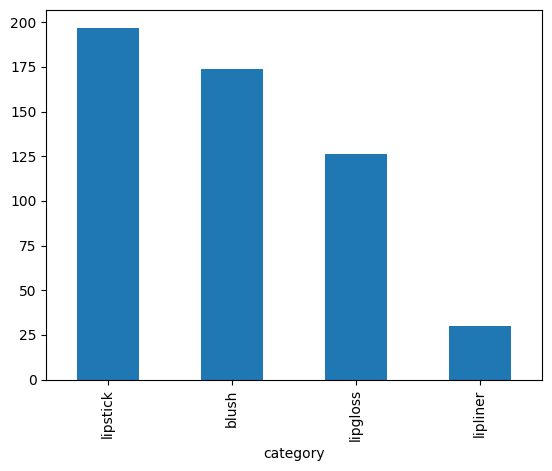

In [190]:
df['category'].value_counts().plot.bar()

In [212]:
brands_count = pd.DataFrame(df['brand'].value_counts())
brands_count = brands_count.reset_index()
brands_count.columns = ['brand', 'total']

print('Percentage of brands with more than 10 products:')

print(round(len(brands_count[brands_count.total > 10].brand.unique())/len(brands_count.brand.unique())*100,2))

print('\n')
print('Percentage of brands with more than 2 products:')
print(round(len(brands_count[brands_count.total > 1].brand.unique())/len(brands_count.brand.unique())*100,2))

print('\n')
print('Number of brands with 1 products')
print(round(len(brands_count[brands_count.total == 1].brand.unique())/len(brands_count.brand.unique())*100,2))


Percentage of brands with more than 10 products:
6.29


Percentage of brands with more than 2 products:
59.12


Number of brands with 1 products
40.88


In [213]:
len(df['brand'].unique())

159